# Concrete Slump Test Regression

The concrete slump test measures the consistency of fresh concrete before it sets. It is performed to check the workability of freshly made concrete, and therefore the ease with which concrete flows. It can also be used as an indicator of an improperly mixed batch.

<img src="https://i0.wp.com/civiconcepts.com/wp-content/uploads/2019/08/Slump-Cone-test-of-concrete.jpg?fit=977%2C488&ssl=1">

Our data set consists of various cement properties and the resulting slump test metrics in cm. Later on the set concrete is tested for its compressive strength 28 days later.

Input variables (9):

(component kg in one M^3 concrete)(7):
* Cement
* Slag
* Fly ash
* Water
* SP
* Coarse Aggr.
* Fine Aggr.

(Measurements)(2)
* SLUMP (cm)
* FLOW (cm)

Target variable (1):
* **28-day Compressive Strength (Mpa)**

Data Source: https://archive.ics.uci.edu/ml/datasets/Concrete+Slump+Test

*Credit: Yeh, I-Cheng, "Modeling slump flow of concrete using second-order regressions and artificial neural networks," Cement and Concrete Composites, Vol.29, No. 6, 474-480, 2007.*

# Importing dependencies

In [157]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Loading data

In [158]:
df = pd.read_csv("cement_slump.csv")

# EDA and Graphical analysis

In [159]:
df

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.000,82.000,105.000,210.000,9.000,904.000,680.000,23.000,62.000,34.990
1,163.000,149.000,191.000,180.000,12.000,843.000,746.000,0.000,20.000,41.140
2,162.000,148.000,191.000,179.000,16.000,840.000,743.000,1.000,20.000,41.810
3,162.000,148.000,190.000,179.000,19.000,838.000,741.000,3.000,21.500,42.080
4,154.000,112.000,144.000,220.000,10.000,923.000,658.000,20.000,64.000,26.820
...,...,...,...,...,...,...,...,...,...,...
98,248.300,101.000,239.100,168.900,7.700,954.200,640.600,0.000,20.000,49.970
99,248.000,101.000,239.900,169.100,7.700,949.900,644.100,2.000,20.000,50.230
100,258.800,88.000,239.600,175.300,7.600,938.900,646.000,0.000,20.000,50.500
101,297.100,40.900,239.900,194.000,7.500,908.900,651.800,27.500,67.000,49.170


In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Cement                              103 non-null    float64
 1   Slag                                103 non-null    float64
 2   Fly ash                             103 non-null    float64
 3   Water                               103 non-null    float64
 4   SP                                  103 non-null    float64
 5   Coarse Aggr.                        103 non-null    float64
 6   Fine Aggr.                          103 non-null    float64
 7   SLUMP(cm)                           103 non-null    float64
 8   FLOW(cm)                            103 non-null    float64
 9   Compressive Strength (28-day)(Mpa)  103 non-null    float64
dtypes: float64(10)
memory usage: 8.2 KB


In [161]:
df.describe()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
count,103.000,103.000,103.000,103.000,103.000,103.000,103.000,103.000,103.000,103.000
mean,229.894,77.974,149.015,197.168,8.540,883.979,739.605,18.049,49.611,36.039
std,78.877,60.461,85.418,20.208,2.808,88.391,63.342,8.751,17.569,7.837
min,137.000,0.000,0.000,160.000,4.400,708.000,640.600,0.000,20.000,17.190
25%,152.000,0.050,115.500,180.000,6.000,819.500,684.500,14.500,38.500,30.900
50%,248.000,100.000,164.000,196.000,8.000,879.000,742.700,21.500,54.000,35.520
75%,303.900,125.000,235.950,209.500,10.000,952.800,788.000,24.000,63.750,41.205
max,374.000,193.000,260.000,240.000,19.000,1049.900,902.000,29.000,78.000,58.530


In [162]:
df.corr()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
Cement,1.000,-0.244,-0.487,0.221,-0.106,-0.310,0.057,0.146,0.186,0.446
Slag,-0.244,1.000,-0.323,-0.027,0.307,-0.224,-0.184,-0.284,-0.327,-0.332
Fly ash,-0.487,-0.323,1.000,-0.241,-0.144,0.173,-0.283,-0.119,-0.055,0.444
Water,0.221,-0.027,-0.241,1.000,-0.155,-0.602,0.115,0.467,0.632,-0.254
SP,-0.106,0.307,-0.144,-0.155,1.000,-0.104,0.058,-0.213,-0.176,-0.038
Coarse Aggr.,-0.310,-0.224,0.173,-0.602,-0.104,1.000,-0.489,-0.188,-0.326,-0.161
Fine Aggr.,0.057,-0.184,-0.283,0.115,0.058,-0.489,1.000,0.202,0.190,-0.155
SLUMP(cm),0.146,-0.284,-0.119,0.467,-0.213,-0.188,0.202,1.000,0.906,-0.223
FLOW(cm),0.186,-0.327,-0.055,0.632,-0.176,-0.326,0.190,0.906,1.000,-0.124
Compressive Strength (28-day)(Mpa),0.446,-0.332,0.444,-0.254,-0.038,-0.161,-0.155,-0.223,-0.124,1.000


<AxesSubplot:>

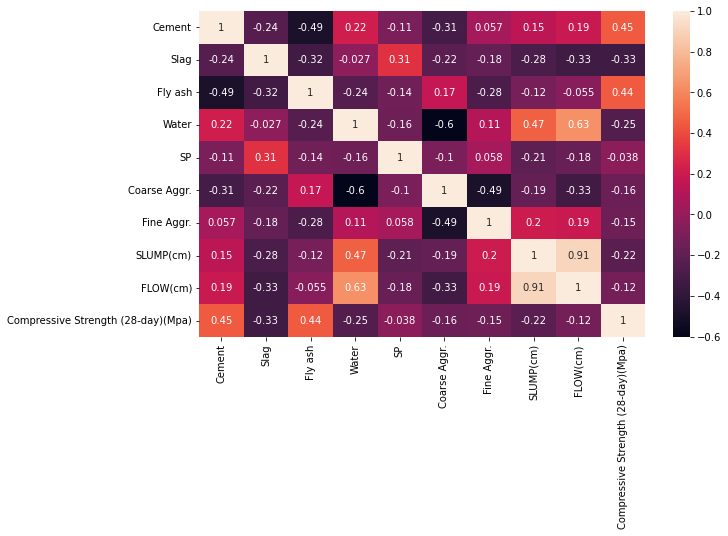

In [163]:
sns.heatmap(df.corr(), annot = True)

# Data Preprocessing 

### Features and target variable

In [164]:
X = df.drop(columns = "Compressive Strength (28-day)(Mpa)")
y = df["Compressive Strength (28-day)(Mpa)"]

In [165]:
X

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm)
0,273.000,82.000,105.000,210.000,9.000,904.000,680.000,23.000,62.000
1,163.000,149.000,191.000,180.000,12.000,843.000,746.000,0.000,20.000
2,162.000,148.000,191.000,179.000,16.000,840.000,743.000,1.000,20.000
3,162.000,148.000,190.000,179.000,19.000,838.000,741.000,3.000,21.500
4,154.000,112.000,144.000,220.000,10.000,923.000,658.000,20.000,64.000
...,...,...,...,...,...,...,...,...,...
98,248.300,101.000,239.100,168.900,7.700,954.200,640.600,0.000,20.000
99,248.000,101.000,239.900,169.100,7.700,949.900,644.100,2.000,20.000
100,258.800,88.000,239.600,175.300,7.600,938.900,646.000,0.000,20.000
101,297.100,40.900,239.900,194.000,7.500,908.900,651.800,27.500,67.000


In [166]:
y

0     34.990
1     41.140
2     41.810
3     42.080
4     26.820
       ...  
98    49.970
99    50.230
100   50.500
101   49.170
102   48.700
Name: Compressive Strength (28-day)(Mpa), Length: 103, dtype: float64

### Polynomial Conversion

In [167]:
from sklearn.preprocessing import PolynomialFeatures

In [168]:
polynomial_converter = PolynomialFeatures(degree=2, include_bias=False)

poly_features = polynomial_converter.fit_transform(X)

In [169]:
poly_features

array([[2.7300e+02, 8.2000e+01, 1.0500e+02, ..., 5.2900e+02, 1.4260e+03,
        3.8440e+03],
       [1.6300e+02, 1.4900e+02, 1.9100e+02, ..., 0.0000e+00, 0.0000e+00,
        4.0000e+02],
       [1.6200e+02, 1.4800e+02, 1.9100e+02, ..., 1.0000e+00, 2.0000e+01,
        4.0000e+02],
       ...,
       [2.5880e+02, 8.8000e+01, 2.3960e+02, ..., 0.0000e+00, 0.0000e+00,
        4.0000e+02],
       [2.9710e+02, 4.0900e+01, 2.3990e+02, ..., 7.5625e+02, 1.8425e+03,
        4.4890e+03],
       [3.4870e+02, 1.0000e-01, 2.2310e+02, ..., 8.4100e+02, 2.2620e+03,
        6.0840e+03]])

In [170]:
poly_features.shape

(103, 54)

### Splitting data into training and testing

In [171]:
from sklearn.model_selection import train_test_split

In [180]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size = 0.2, random_state = 42)

In [181]:
print("Train feature shape : ", X_train.shape)
print("Train target shape : ", y_train.shape)
print("Test features shape : ", X_test.shape)
print("Test target shape :", y_test.shape)

Train feature shape :  (82, 54)
Train target shape :  (82,)
Test features shape :  (21, 54)
Test target shape : (21,)


## Scaling

In [182]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler


In [183]:
scaler = StandardScaler()

In [184]:
scaler.fit(X_train)

StandardScaler()

In [185]:
X_train_scaled = scaler.transform(X_train) # Apply transform according to fit
X_train_scaled

array([[ 0.99742015, -1.29720985, -0.03597016, ...,  0.75228202,
         0.77883024,  0.7321976 ],
       [-1.04096079,  1.65777393, -1.64936204, ..., -1.60454272,
        -1.58700364, -1.39418565],
       [ 1.13668842,  0.78769537,  0.21399196, ..., -1.58817588,
        -1.52340596, -1.39418565],
       ...,
       [ 0.93158425, -1.29392653,  1.07522509, ...,  0.95277579,
         1.5133835 ,  2.1152111 ],
       [ 1.41522494,  0.93544456, -1.64936204, ...,  0.19990122,
         0.44971222,  0.65625534],
       [ 1.50005198, -1.29556819,  0.88548112, ...,  1.83658507,
         2.00944545,  2.1152111 ]])

In [186]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[ 1.14934917, -1.29720985,  0.21399196, ...,  0.75228202,
         0.70251302,  0.58154791],
       [-0.81306726, -1.29720985,  1.30473577, ...,  0.19990122,
         0.21599073,  0.15923486],
       [ 0.87081264,  0.45936384, -1.64936204, ...,  0.95277579,
         0.91715521,  0.80937469],
       ...,
       [-1.11692529,  0.8369451 ,  0.24807771, ...,  1.05609146,
         1.12941248,  1.1304314 ],
       [ 0.9847594 ,  0.52503015, -0.03597016, ...,  0.95277579,
         1.19539508,  1.38418968],
       [ 0.36185044,  0.14744889,  1.07295271, ..., -1.60454272,
        -1.58700364, -1.39418565]])

In [187]:
pd.DataFrame(X_train_scaled).agg(["mean", "std"]).round()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
mean,0.000,-0.000,0.000,0.000,0.000,0.000,0.000,-0.000,0.000,-0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [188]:
pd.DataFrame(X_test_scaled).agg(["mean", "std"]).round()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
mean,-0.000,-0.000,0.000,0.000,-0.000,-0.000,0.000,0.000,0.000,-0.000,...,-0.000,-0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


##  1. Model Building (Linear Regression)

In [189]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

In [190]:
lm.fit(X_train_scaled, y_train) # We use scaled form of X_train not the original form. 
                                # But not the same thing for y_train because it's only one feature no need to be scaled.

LinearRegression()

In [191]:
y_pred = lm.predict(X_test_scaled)
y_train_pred = lm.predict(X_train_scaled)

###  Interpret the model

In [192]:
lm.coef_

array([ 9.27372653e+02,  8.63680610e+02,  1.16040522e+03,  7.46256434e+02,
        2.42516698e+02,  1.25740575e+03,  8.28565914e+02,  1.80111293e+02,
       -1.63760231e+02, -6.83187564e+01, -6.18887824e+01, -8.00932605e+01,
       -2.24773786e+02, -2.17925545e+01, -2.91776517e+02, -2.59190178e+02,
       -1.49764360e+01,  1.70083380e+01, -2.51187210e+01, -6.16520467e+01,
       -1.83092328e+02, -2.27773243e+01, -3.01330978e+02, -2.19152252e+02,
       -1.02697349e+01,  1.10835618e+01, -5.31723519e+01, -2.49391087e+02,
       -2.33684273e+01, -4.30279217e+02, -2.84712116e+02, -1.38642257e+01,
        1.62850092e+01, -1.26419596e+02, -4.73900795e+01, -2.38885104e+02,
       -2.87045438e+02, -4.80433178e+01,  4.30697919e+01, -4.52499699e+00,
       -8.40561756e+01, -7.27680879e+01, -3.59140466e+00,  3.85391095e+00,
       -4.49679915e+02, -3.02480490e+02, -5.60016653e+01,  5.04615853e+01,
       -2.31575353e+02, -5.21244845e+01,  4.60112572e+01, -2.25288118e+00,
        6.72988293e+00, -

In [193]:
lm.intercept_

35.847195121950634

In [194]:
my_dict = {"Actual": y_test, "Pred": y_pred, "Residual":y_test-y_pred}

In [195]:
comparing = pd.DataFrame(my_dict)
comparing

,Actual,Pred,Residual
30,45.820,45.989,-0.169
67,40.340,40.102,0.238
62,28.290,28.827,-0.537
47,43.010,42.655,0.355
42,33.510,33.742,-0.232
40,35.660,38.161,-2.501
90,35.520,34.219,1.301
45,31.770,32.469,-0.699
10,26.020,26.357,-0.337
0,34.990,35.317,-0.327


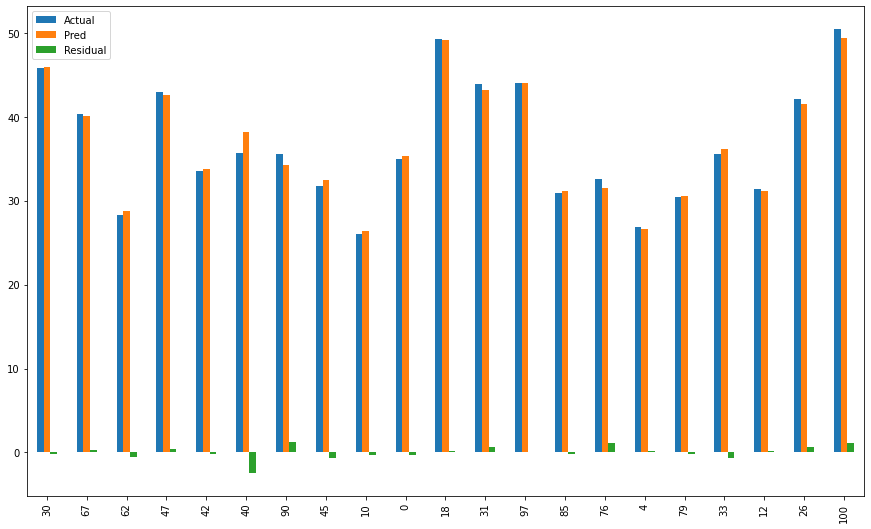

In [196]:
comparing.plot(kind ="bar", figsize=(15,9))
plt.show()

In [197]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def train_val(y_train, y_train_pred, y_test, y_pred, name):
    
    scores = {name+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    name+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [198]:
ls =train_val(y_train, y_train_pred, y_test, y_pred, "linear") # Evaluate the result. Overfitting?
ls

,linear_train,linear_test
R2,0.999,0.988
mae,0.179,0.564
mse,0.063,0.625
rmse,0.251,0.791


## Cross Validation

We do cross-validation to check whether the one-time scores we receive are consistent or not

cross validation is only applied to the train set.

In [199]:
from sklearn.model_selection import cross_validate

In [200]:
model = LinearRegression()
scores = cross_validate(model, X_train_scaled, y_train, scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', \
                                                            'neg_root_mean_squared_error'], cv = 5)

In [201]:
scores

{'fit_time': array([0., 0., 0., 0., 0.]),
 'score_time': array([0.00800133, 0.00800133, 0.        , 0.00800252, 0.        ]),
 'test_r2': array([0.96290239, 0.92765811, 0.95173147, 0.9867327 , 0.94728311]),
 'test_neg_mean_absolute_error': array([-1.03438795, -1.2860832 , -0.80239748, -0.90019376, -1.32654636]),
 'test_neg_mean_squared_error': array([-2.98181557, -2.65246914, -1.34140974, -1.4563487 , -2.97761228]),
 'test_neg_root_mean_squared_error': array([-1.72679344, -1.62864027, -1.15819245, -1.20679273, -1.72557593])}

In [202]:
pd.DataFrame(scores, index = range(1,6))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.000,0.008,0.963,-1.034,-2.982,-1.727
2,0.000,0.008,0.928,-1.286,-2.652,-1.629
3,0.000,0.000,0.952,-0.802,-1.341,-1.158
4,0.000,0.008,0.987,-0.900,-1.456,-1.207
5,0.000,0.000,0.947,-1.327,-2.978,-1.726


In [203]:
scores = pd.DataFrame(scores, index=range(1,6))
scores.iloc[:, 2:].mean()

test_r2                             0.955
test_neg_mean_absolute_error       -1.070
test_neg_mean_squared_error        -2.282
test_neg_root_mean_squared_error   -1.489
dtype: float64

In [204]:
train_val(y_train, y_train_pred, y_test, y_pred, "linear")

,linear_train,linear_test
R2,0.999,0.988
mae,0.179,0.564
mse,0.063,0.625
rmse,0.251,0.791


### 1.2 Model Evaluation

In [205]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance:")
    print("--------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [206]:
eval_metric(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.987644120299875
MAE 		: 0.5638877891005453
MSE 		: 0.6251731909382683
RMSE 		: 0.7906789430219249


In [207]:
y_train_pred = lm.predict(X_train_scaled)

In [208]:
eval_metric(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.9990059327622911
MAE 		: 0.178650353108582
MSE 		: 0.06288795029908344
RMSE 		: 0.2507747002771281


# 2. Regularization

## 2.1 Ridge (Apply and evaluate)

In [209]:
from sklearn.linear_model import Ridge

In [210]:
ridge_model = Ridge(alpha=1, random_state=42)

In [211]:
ridge_model.fit(X_train_scaled, y_train)

Ridge(alpha=1, random_state=42)

In [212]:
y_pred = ridge_model.predict(X_test_scaled)
y_train_pred = ridge_model.predict(X_train_scaled)

In [213]:
rs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge")
rs

,ridge_train,ridge_test
R2,0.958,0.929
mae,1.273,1.389
mse,2.686,3.584
rmse,1.639,1.893


In [214]:
pd.concat([ls, rs], axis=1)

,linear_train,linear_test,ridge_train,ridge_test
R2,0.999,0.988,0.958,0.929
mae,0.179,0.564,1.273,1.389
mse,0.063,0.625,2.686,3.584
rmse,0.251,0.791,1.639,1.893


## Choosing best alpha value with Cross-Validation

In [215]:
from sklearn.linear_model import RidgeCV

In [216]:
alpha_space = np.linspace(0.01, 1, 100)
alpha_space

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

In [217]:
ridge_cv_model = RidgeCV(alphas=alpha_space, cv = 5, scoring= "neg_root_mean_squared_error")

In [218]:
ridge_cv_model.fit(X_train_scaled, y_train)

RidgeCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=5, scoring='neg_root_mean_squared_error')

In [219]:
ridge_cv_model.alpha_ #Ridge(alpha=0.02)

0.01

In [220]:
ridge_cv_model.best_score_

-1.5507198532932878

In [221]:
y_pred = ridge_cv_model.predict(X_test_scaled)
y_train_pred = ridge_cv_model.predict(X_train_scaled)

In [222]:
rcs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge_cv")
rcs

,ridge_cv_train,ridge_cv_test
R2,0.998,0.990
mae,0.293,0.574
mse,0.137,0.516
rmse,0.370,0.718


In [223]:
pd.concat([ls, rs, rcs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test
R2,0.999,0.988,0.958,0.929,0.998,0.990
mae,0.179,0.564,1.273,1.389,0.293,0.574
mse,0.063,0.625,2.686,3.584,0.137,0.516
rmse,0.251,0.791,1.639,1.893,0.370,0.718


##  Lasso (Apply and evalute)

In [224]:
from sklearn.linear_model import Lasso, LassoCV

In [225]:
lasso_model = Lasso(alpha=1, random_state=42)
lasso_model.fit(X_train_scaled, y_train)

Lasso(alpha=1, random_state=42)

In [226]:
y_pred = lasso_model.predict(X_test_scaled)
y_train_pred = lasso_model.predict(X_train_scaled)

In [227]:
lss = train_val(y_train, y_train_pred, y_test, y_pred, "lasso")
lss

,lasso_train,lasso_test
R2,0.828,0.872
mae,2.533,1.990
mse,10.854,6.459
rmse,3.295,2.541


In [228]:
pd.concat([ls, rs, rcs, lss], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test
R2,0.999,0.988,0.958,0.929,0.998,0.990,0.828,0.872
mae,0.179,0.564,1.273,1.389,0.293,0.574,2.533,1.990
mse,0.063,0.625,2.686,3.584,0.137,0.516,10.854,6.459
rmse,0.251,0.791,1.639,1.893,0.370,0.718,3.295,2.541


## For Lasso CV with Default Alpha : 1

In [229]:
model = Lasso(alpha=1, random_state=42)
scores = cross_validate(model, X_train_scaled, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=5)

In [230]:
pd.DataFrame(scores, index = range(1, 6))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.008,0.000,0.773,-2.933,-18.251,-4.272
2,0.008,0.000,0.689,-2.719,-11.397,-3.376
3,0.000,0.008,0.833,-1.753,-4.630,-2.152
4,0.000,0.000,0.799,-3.623,-22.022,-4.693
5,0.008,0.000,0.773,-2.903,-12.817,-3.580


In [231]:
scores = pd.DataFrame(scores, index = range(1, 6))
scores.iloc[:,2:].mean()

test_r2                              0.774
test_neg_mean_absolute_error        -2.786
test_neg_mean_squared_error        -13.823
test_neg_root_mean_squared_error    -3.615
dtype: float64

In [232]:
train_val(y_train, y_train_pred, y_test, y_pred, "lasso")

,lasso_train,lasso_test
R2,0.828,0.872
mae,2.533,1.990
mse,10.854,6.459
rmse,3.295,2.541


<AxesSubplot:>

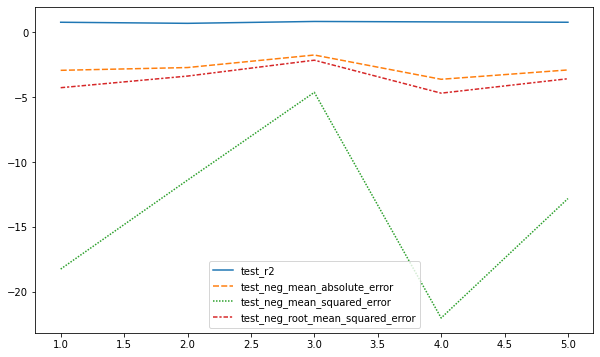

In [233]:
sns.lineplot(data = scores.iloc[:,2:])

In [234]:
lasso_model.coef_

array([ 0.        , -0.        ,  0.        , -0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        ,  4.64141229,  0.        ,  0.        ,  2.15114819,
        0.        , -0.        ,  0.        , -0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        ,  0.        ,  0.        ,  0.1213628 ,  0.        ,
        0.        , -0.        ,  0.        , -0.        ,  0.        ,
       -1.71353192, -0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.42281842, -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        ])

In [235]:
lsm_df = pd.DataFrame(lasso_model.coef_, columns = ["lasso_coef_1"])

## Choosing best alpha value with Cross-Validation

In [236]:
lasso_cv_model = LassoCV(alphas = alpha_space, cv = 5, max_iter=100000, random_state=42) 

In [237]:
lasso_cv_model.fit(X_train_scaled, y_train)

LassoCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=5, max_iter=100000, random_state=42)

In [238]:
lasso_cv_model.alpha_

0.01

In [239]:
np.where(alpha_space[::-1]==lasso_cv_model.alpha_)

(array([99], dtype=int64),)

In [240]:
alpha_space[::-1]

array([1.  , 0.99, 0.98, 0.97, 0.96, 0.95, 0.94, 0.93, 0.92, 0.91, 0.9 ,
       0.89, 0.88, 0.87, 0.86, 0.85, 0.84, 0.83, 0.82, 0.81, 0.8 , 0.79,
       0.78, 0.77, 0.76, 0.75, 0.74, 0.73, 0.72, 0.71, 0.7 , 0.69, 0.68,
       0.67, 0.66, 0.65, 0.64, 0.63, 0.62, 0.61, 0.6 , 0.59, 0.58, 0.57,
       0.56, 0.55, 0.54, 0.53, 0.52, 0.51, 0.5 , 0.49, 0.48, 0.47, 0.46,
       0.45, 0.44, 0.43, 0.42, 0.41, 0.4 , 0.39, 0.38, 0.37, 0.36, 0.35,
       0.34, 0.33, 0.32, 0.31, 0.3 , 0.29, 0.28, 0.27, 0.26, 0.25, 0.24,
       0.23, 0.22, 0.21, 0.2 , 0.19, 0.18, 0.17, 0.16, 0.15, 0.14, 0.13,
       0.12, 0.11, 0.1 , 0.09, 0.08, 0.07, 0.06, 0.05, 0.04, 0.03, 0.02,
       0.01])

In [241]:
#mse score for CV
lasso_cv_model.mse_path_[99].mean()

4.945897671453858

In [242]:
y_pred = lasso_cv_model.predict(X_test_scaled)   #Lasso(alpha =0.01)
y_train_pred = lasso_cv_model.predict(X_train_scaled)

In [243]:
lcs = train_val(y_train, y_train_pred, y_test, y_pred, "lasso_cv")
lcs

,lasso_cv_train,lasso_cv_test
R2,0.983,0.966
mae,0.802,0.988
mse,1.059,1.713
rmse,1.029,1.309


In [244]:
pd.concat([ls,rs, rcs, lss, lcs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test
R2,0.999,0.988,0.958,0.929,0.998,0.990,0.828,0.872,0.983,0.966
mae,0.179,0.564,1.273,1.389,0.293,0.574,2.533,1.990,0.802,0.988
mse,0.063,0.625,2.686,3.584,0.137,0.516,10.854,6.459,1.059,1.713
rmse,0.251,0.791,1.639,1.893,0.370,0.718,3.295,2.541,1.029,1.309


In [245]:
lasso_cv_model.coef_

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -9.55259489e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  9.04808295e-03,  1.85029769e+00,
       -3.69211836e+00, -0.00000000e+00,  8.83103918e+00,  5.57698332e-01,
        0.00000000e+00, -1.37097395e+00, -1.09604507e+00, -8.86195309e-01,
       -0.00000000e+00,  2.89291910e+00, -0.00000000e+00,  5.79553591e-01,
       -5.40945692e-01, -0.00000000e+00, -9.85919463e-01, -7.03907602e+00,
        2.05370548e+00,  0.00000000e+00,  1.09660480e+01, -2.75736514e-01,
       -0.00000000e+00,  1.57481869e+01, -1.43900237e+00, -4.98460716e+00,
       -1.82692462e+00, -0.00000000e+00,  6.55345320e-01, -0.00000000e+00,
       -8.51162942e-01,  0.00000000e+00,  2.96054053e-01,  2.00888847e-01,
       -0.00000000e+00,  6.78767938e-01,  0.00000000e+00,  0.00000000e+00,
       -1.94500511e+00, -1.16148225e+00, -0.00000000e+00,  8.61576949e-01,
        0.00000000e+00,  

##  Elastic-Net (Apply and evaluate )
* Use Gridsearch for hyperparameter tuning instead of ElacticnetCV

In [246]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

In [247]:
elastic_model = ElasticNet(alpha=1, l1_ratio=0.5, random_state=42) # l1_ratio: 1: Lasso or 0:Ridge
elastic_model.fit(X_train_scaled, y_train)

ElasticNet(alpha=1, random_state=42)

In [248]:
y_pred = elastic_model.predict(X_test_scaled)
y_train_pred = elastic_model.predict(X_train_scaled)

In [249]:
es = train_val(y_train, y_train_pred, y_test, y_pred, "elastic")
es

,elastic_train,elastic_test
R2,0.848,0.846
mae,2.337,2.114
mse,9.616,7.816
rmse,3.101,2.796


In [250]:
pd.concat([ls,rs, rcs, lss, lcs, es], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test,elastic_train,elastic_test
R2,0.999,0.988,0.958,0.929,0.998,0.990,0.828,0.872,0.983,0.966,0.848,0.846
mae,0.179,0.564,1.273,1.389,0.293,0.574,2.533,1.990,0.802,0.988,2.337,2.114
mse,0.063,0.625,2.686,3.584,0.137,0.516,10.854,6.459,1.059,1.713,9.616,7.816
rmse,0.251,0.791,1.639,1.893,0.370,0.718,3.295,2.541,1.029,1.309,3.101,2.796


## Choosing best alpha and l1_ratio values with Cross-Validation

In [251]:
elastic_cv_model = ElasticNetCV(alphas = alpha_space, l1_ratio=[0.1, 0.5, 0.7,0.9, 0.95, 1], cv = 5, 
                                max_iter = 100000,random_state=42)

In [252]:
elastic_cv_model.fit(X_train_scaled, y_train)

ElasticNetCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
             cv=5, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 1], max_iter=100000,
             random_state=42)

In [253]:
elastic_cv_model.alpha_

0.01

In [254]:
elastic_cv_model.l1_ratio_

1.0

In [255]:
y_pred = elastic_cv_model.predict(X_test_scaled)
y_train_pred = elastic_cv_model.predict(X_train_scaled)

In [256]:
ecs = train_val(y_train, y_train_pred, y_test, y_pred, "elastic_cv")
ecs

,elastic_cv_train,elastic_cv_test
R2,0.983,0.966
mae,0.802,0.988
mse,1.059,1.713
rmse,1.029,1.309


In [257]:
pd.concat([ls,rs, rcs, lss, lcs, es, ecs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test,elastic_train,elastic_test,elastic_cv_train,elastic_cv_test
R2,0.999,0.988,0.958,0.929,0.998,0.990,0.828,0.872,0.983,0.966,0.848,0.846,0.983,0.966
mae,0.179,0.564,1.273,1.389,0.293,0.574,2.533,1.990,0.802,0.988,2.337,2.114,0.802,0.988
mse,0.063,0.625,2.686,3.584,0.137,0.516,10.854,6.459,1.059,1.713,9.616,7.816,1.059,1.713
rmse,0.251,0.791,1.639,1.893,0.370,0.718,3.295,2.541,1.029,1.309,3.101,2.796,1.029,1.309


In [258]:
elastic_cv_model.coef_

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -9.55259489e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  9.04808295e-03,  1.85029769e+00,
       -3.69211836e+00, -0.00000000e+00,  8.83103918e+00,  5.57698332e-01,
        0.00000000e+00, -1.37097395e+00, -1.09604507e+00, -8.86195309e-01,
       -0.00000000e+00,  2.89291910e+00, -0.00000000e+00,  5.79553591e-01,
       -5.40945692e-01, -0.00000000e+00, -9.85919463e-01, -7.03907602e+00,
        2.05370548e+00,  0.00000000e+00,  1.09660480e+01, -2.75736514e-01,
       -0.00000000e+00,  1.57481869e+01, -1.43900237e+00, -4.98460716e+00,
       -1.82692462e+00, -0.00000000e+00,  6.55345320e-01, -0.00000000e+00,
       -8.51162942e-01,  0.00000000e+00,  2.96054053e-01,  2.00888847e-01,
       -0.00000000e+00,  6.78767938e-01,  0.00000000e+00,  0.00000000e+00,
       -1.94500511e+00, -1.16148225e+00, -0.00000000e+00,  8.61576949e-01,
        0.00000000e+00,  

### Grid Search

In [259]:
from sklearn.model_selection import GridSearchCV

In [260]:
elastic_model = ElasticNet(max_iter=10000, random_state=42)

In [261]:
param_grid = {"alpha":[0.01, 0.012, 0.2, 0.5, 0.6, 0.7, 1],
            "l1_ratio":[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]}

In [262]:
grid_model = GridSearchCV(estimator = elastic_model, param_grid = param_grid, scoring = 'neg_root_mean_squared_error',
                         cv =5, verbose =2)

In [263]:
grid_model.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 49 candidates, totalling 245 fits
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.7; total time=   0.0s
[CV] END ...........................alpha=0.01,

[CV] END ..............................alpha=0.2, l1_ratio=1; total time=   0.0s
[CV] END ..............................alpha=0.2, l1_ratio=1; total time=   0.0s
[CV] END ..............................alpha=0.2, l1_ratio=1; total time=   0.0s
[CV] END ..............................alpha=0.2, l1_ratio=1; total time=   0.0s
[CV] END ............................alpha=0.5, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.5, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.5, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.5, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.5, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.5, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.5, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.5, l1_ratio=0.5; total time=   0.0s
[CV] END ...................

[CV] END .............................alpha=1, l1_ratio=0.95; total time=   0.0s
[CV] END .............................alpha=1, l1_ratio=0.95; total time=   0.0s
[CV] END .............................alpha=1, l1_ratio=0.95; total time=   0.0s
[CV] END .............................alpha=1, l1_ratio=0.95; total time=   0.0s
[CV] END .............................alpha=1, l1_ratio=0.95; total time=   0.0s
[CV] END .............................alpha=1, l1_ratio=0.99; total time=   0.0s
[CV] END .............................alpha=1, l1_ratio=0.99; total time=   0.0s
[CV] END .............................alpha=1, l1_ratio=0.99; total time=   0.0s
[CV] END .............................alpha=1, l1_ratio=0.99; total time=   0.0s
[CV] END .............................alpha=1, l1_ratio=0.99; total time=   0.0s
[CV] END ................................alpha=1, l1_ratio=1; total time=   0.0s
[CV] END ................................alpha=1, l1_ratio=1; total time=   0.0s
[CV] END ...................

GridSearchCV(cv=5, estimator=ElasticNet(max_iter=10000, random_state=42),
             param_grid={'alpha': [0.01, 0.012, 0.2, 0.5, 0.6, 0.7, 1],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [264]:
grid_model.best_params_

{'alpha': 0.01, 'l1_ratio': 1}

In [265]:
pd.DataFrame(grid_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.050,0.018,0.002,0.003,0.010,0.100,"{'alpha': 0.01, 'l1_ratio': 0.1}",-2.236,-3.262,-1.831,-2.320,-3.513,-2.632,0.643,14
1,0.029,0.011,0.000,0.000,0.010,0.500,"{'alpha': 0.01, 'l1_ratio': 0.5}",-2.122,-3.126,-1.809,-2.175,-3.346,-2.515,0.605,11
2,0.025,0.005,0.002,0.003,0.010,0.700,"{'alpha': 0.01, 'l1_ratio': 0.7}",-2.017,-3.053,-1.833,-2.095,-3.214,-2.442,0.573,9
3,0.029,0.004,0.002,0.003,0.010,0.900,"{'alpha': 0.01, 'l1_ratio': 0.9}",-1.992,-2.980,-1.865,-1.862,-2.940,-2.328,0.518,7
4,0.034,0.006,0.002,0.003,0.010,0.950,"{'alpha': 0.01, 'l1_ratio': 0.95}",-1.934,-2.984,-1.859,-1.781,-2.813,-2.274,0.515,5
5,0.072,0.017,0.000,0.000,0.010,0.990,"{'alpha': 0.01, 'l1_ratio': 0.99}",-1.762,-3.010,-1.875,-1.687,-2.646,-2.196,0.532,2
6,0.074,0.029,0.000,0.000,0.010,1,"{'alpha': 0.01, 'l1_ratio': 1}",-1.671,-3.017,-1.884,-1.622,-2.583,-2.155,0.551,1
7,0.043,0.016,0.002,0.003,0.012,0.100,"{'alpha': 0.012, 'l1_ratio': 0.1}",-2.214,-3.264,-1.813,-2.397,-3.551,-2.648,0.655,16
8,0.030,0.006,0.000,0.000,0.012,0.500,"{'alpha': 0.012, 'l1_ratio': 0.5}",-2.109,-3.117,-1.794,-2.264,-3.410,-2.539,0.618,12
9,0.022,0.006,0.002,0.003,0.012,0.700,"{'alpha': 0.012, 'l1_ratio': 0.7}",-2.019,-3.033,-1.819,-2.202,-3.305,-2.476,0.585,10


In [266]:
grid_model.best_index_

6

In [267]:
grid_model.best_score_

-2.1552078454628703

## Using Best Hyper Parameters From GridSearch

In [268]:
y_pred = grid_model.predict(X_test_scaled)
y_train_pred = grid_model.predict(X_train_scaled)

In [269]:
train_val(y_train, y_train_pred, y_test, y_pred, "GridSearch")

,GridSearch_train,GridSearch_test
R2,0.983,0.966
mae,0.802,0.988
mse,1.059,1.712
rmse,1.029,1.309


# Final Model¶

In [270]:
final_scaler = StandardScaler()
X_scaled = final_scaler.fit_transform(poly_features)

In [271]:
final_model = Lasso(alpha=0.01) #lasso_cv_model

In [272]:
final_model.fit(X_scaled, y)

Lasso(alpha=0.01)